In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [41]:
pistachio = pd.read_csv("pistachio.csv") #https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection?resource=download
pistachio["Class"] = pistachio["Class"].replace({"Kirmizi_Pistachio":0,"Siit_Pistachio":1})
pistachio

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,0
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,1
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,0
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,0
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,0
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,0
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,1
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,0


In [42]:
X = pistachio

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

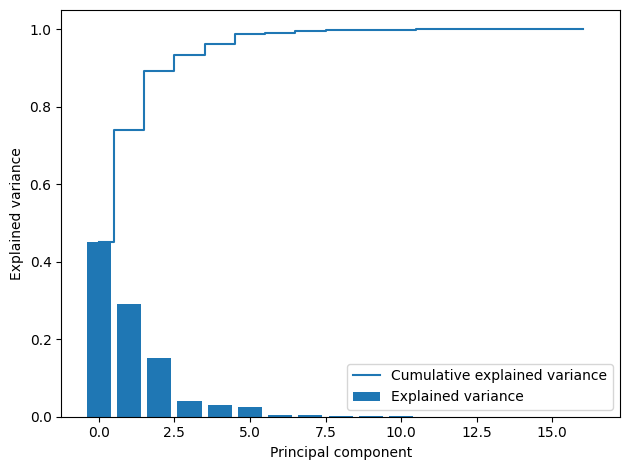

In [43]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

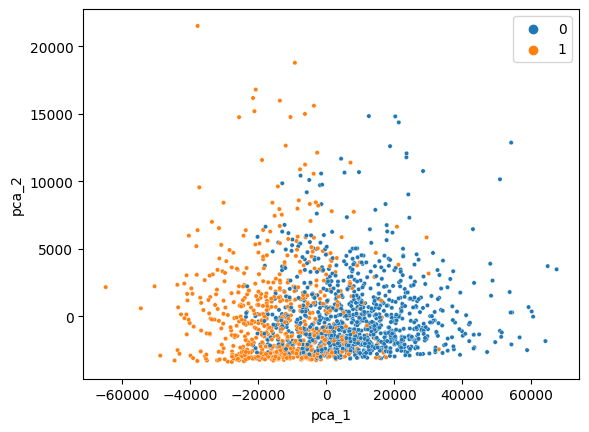

In [56]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': pistachio['Class']})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
ax.legend()

c:\Users\Дмитро\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Дмитро\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


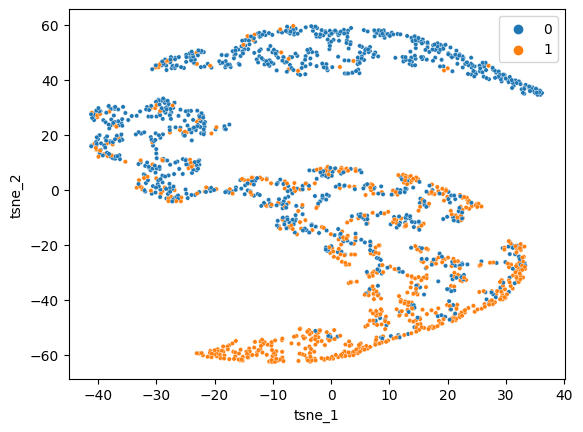

In [57]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': pistachio["Class"]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
ax.legend()